In [1]:
import yaml
import json
import numpy as np
import cv2
import albumentations as A
from albumentations.core.serialization import to_dict
from skimage.io import imread
import matplotlib.pyplot as plt

from pprint import pprint

%matplotlib inline

In [2]:
def print_transforms(t):
    d = to_dict(t)
    print(yaml.safe_dump(d))

(256, 1600, 3)


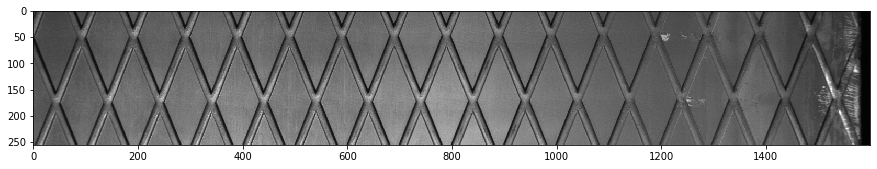

In [3]:
img = cv2.resize(imread('../data/train_images/000789191.jpg'), (1600, 256))
print(img.shape)

plt.figure(figsize=(15, 15))
plt.imshow(img);

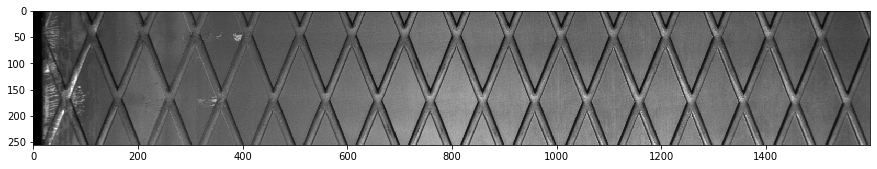

In [4]:
plt.figure(figsize=(15, 15))
plt.imshow(np.flip(img, 1));

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


__version__: 0.3.3
transform:
  __class_fullname__: albumentations.core.composition.Compose
  additional_targets: {}
  bbox_params: null
  keypoint_params: null
  p: 1.0
  transforms:
  - __class_fullname__: albumentations.augmentations.transforms.RandomCrop
    always_apply: false
    height: 256
    p: 1.0
    width: 400
  - __class_fullname__: albumentations.augmentations.transforms.GaussNoise
    always_apply: false
    p: 0.5
    var_limit:
    - 10.0
    - 50.0
  - __class_fullname__: albumentations.augmentations.transforms.HorizontalFlip
    always_apply: false
    p: 0.5
  - __class_fullname__: albumentations.augmentations.transforms.Normalize
    always_apply: false
    max_pixel_value: 255.0
    mean:
    - 0.485
    - 0.456
    - 0.406
    p: 1.0
    std:
    - 0.229
    - 0.224
    - 0.225



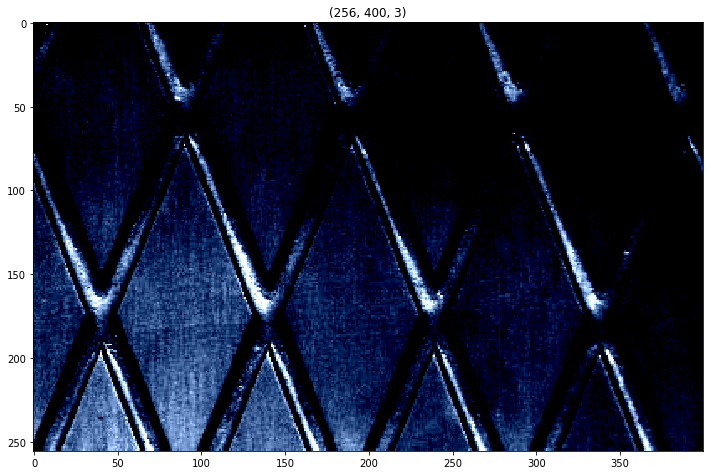

In [15]:
t = A.Compose([
    A.RandomCrop(256, 400),
    A.GaussNoise(),
#     A.RandomBrightness(limit=0.5, p=0.5),
#     A.GridDistortion(distort_limit=0.5, border_mode=cv2.BORDER_CONSTANT, value=0, mask_value=0, p=0.5),
#     A.ElasticTransform(alpha=0.3, alpha_affine=10, border_mode=cv2.BORDER_REPLICATE, value=0, p=0.5),
    A.HorizontalFlip(),
    A.Normalize(),
])

out = t(image=img)['image']

plt.figure(figsize=(12, 12))
plt.imshow(out)
plt.title(out.shape);

print_transforms(t)

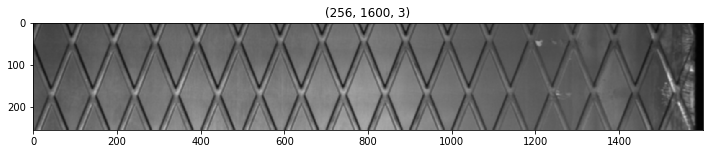

In [213]:
t = A.Compose([
    A.Resize(256, 1600),
    A.Blur(blur_limit=(1, 10), p=1),
    A.HorizontalFlip(),
#     A.Normalize(),
])

out = t(image=img)['image']

plt.figure(figsize=(12, 12))
plt.imshow(out)
plt.title(out.shape);

# print_transforms(t)

In [20]:
t = A.Compose([
    A.Resize(256, 1600),
    A.Normalize()
])
print_transforms(t)

__version__: 0.3.3
transform:
  __class_fullname__: albumentations.core.composition.Compose
  additional_targets: {}
  bbox_params: null
  keypoint_params: null
  p: 1.0
  transforms:
  - __class_fullname__: albumentations.augmentations.transforms.Resize
    always_apply: false
    height: 256
    interpolation: 1
    p: 1
    width: 1600
  - __class_fullname__: albumentations.augmentations.transforms.Normalize
    always_apply: false
    max_pixel_value: 255.0
    mean:
    - 0.485
    - 0.456
    - 0.406
    p: 1.0
    std:
    - 0.229
    - 0.224
    - 0.225



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


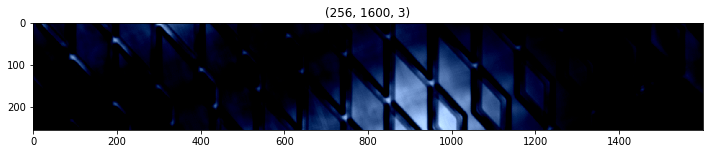

In [21]:
t = A.Compose([
    A.Resize(256, 1600),
    A.Flip(),
    A.Blur(blur_limit=20),
    A.ShiftScaleRotate(rotate_limit=25, scale_limit=0.2),
    A.Normalize(),
])

out = t(image=img)['image']

plt.figure(figsize=(12, 12))
plt.imshow(out)
plt.title(out.shape);

In [22]:
print_transforms(t)

__version__: 0.3.3
transform:
  __class_fullname__: albumentations.core.composition.Compose
  additional_targets: {}
  bbox_params: null
  keypoint_params: null
  p: 1.0
  transforms:
  - __class_fullname__: albumentations.augmentations.transforms.Resize
    always_apply: false
    height: 256
    interpolation: 1
    p: 1
    width: 1600
  - __class_fullname__: albumentations.augmentations.transforms.Flip
    always_apply: false
    p: 0.5
  - __class_fullname__: albumentations.augmentations.transforms.Blur
    always_apply: false
    blur_limit:
    - 3
    - 20
    p: 0.5
  - __class_fullname__: albumentations.augmentations.transforms.ShiftScaleRotate
    always_apply: false
    border_mode: 4
    interpolation: 1
    mask_value: null
    p: 0.5
    rotate_limit:
    - -25
    - 25
    scale_limit:
    - -0.19999999999999996
    - 0.19999999999999996
    shift_limit:
    - -0.0625
    - 0.0625
    value: null
  - __class_fullname__: albumentations.augmentations.transforms.Normalize
